In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We import a DataSet that shows Internet access by tech and by province

In [2]:
df = pd.read_csv('../DataSets/Internet_Accesos-por-tecnologia_y_pcia.csv', sep = ',')

Inspect the DataSet

In [3]:
df.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Get an insight of it

In [4]:
df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


See how many null values there are in our DataFrame and delete them

In [6]:
df.isna().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Now check for any duplicate value

In [9]:
df.duplicated().sum()

0

Rename the columns for an easier read

In [10]:
dfColumns = {'Año': 'Year', 'Provincia': 'Province', 'Fibra óptica': 'Optic Fiber', 'Trimestre': 'Quarter', 'Otros': 'Others', 'Cablemodem': 'Cable modem'}

In [11]:
df.rename(columns = dfColumns, inplace = True)

In [12]:
df.head()

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Explore the `Year` & `Quarter` column to see its unique values

In [13]:
df['Quarter'].unique()

array(['4', '3', '2', '1', '3 *', '2 *', '1 *'], dtype=object)

In [14]:
df['Year'].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014'], dtype=object)

We see that there are some values with an '*`*`*', which we do not quite know its meaning.

We create a temporary DataFrame with only asterisk (`*`) values to better understand the data when deciding whether to discard them or not

In [15]:
asterisk = df[df['Quarter'].isin(['3 *', '2 *', '1 *'])]

In [16]:
asterisk.head(50)

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
312,2019 *,3 *,Buenos Aires,1.0,2.0,425.0,86.0,27.0,4.0
313,2019 *,3 *,Capital Federal,300.0,1.0,25.0,4.0,31.0,1.0
314,2019 *,3 *,Catamarca,24.0,6.0,13.0,244.0,2.0,32.0
315,2019 *,3 *,Chaco,50.0,49.0,8.0,5.0,2.0,114.0
316,2019 *,3 *,Chubut,37.0,27.0,2.0,15.0,8.0,89.0
317,2019 *,3 *,Córdoba,308.0,399.0,30.0,37.0,9.0,783.0
318,2019 *,3 *,Corrientes,53.0,50.0,2.0,2.0,5.0,113.0
319,2019 *,3 *,Entre Ríos,95.0,96.0,13.0,19.0,15.0,238.0
320,2019 *,3 *,Formosa,22.0,8.0,1.0,14.0,162.0,46.0
321,2019 *,3 *,Jujuy,33.0,36.0,274.0,812.0,17.0,87.0


At first glance, these values seem to be just fine. We are going to keep them but first we'll do some data cleaning

We drop the *`*`* from the `Year` and `Quarter` columns

In [17]:
# We define a replace map
replace_mapping = {'3 *': '3', '2 *': '2', '1 *': '1'}

df['Quarter'] = df['Quarter'].replace(replace_mapping)

In [18]:
df['Quarter'].unique()

array(['4', '3', '2', '1'], dtype=object)

We do the same thing for the `Year` column, but just for the value _2019_

In [19]:
df['Year'] = df['Year'].replace('2019 *', '2019')

In [20]:
df['Year'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

In [21]:
df

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


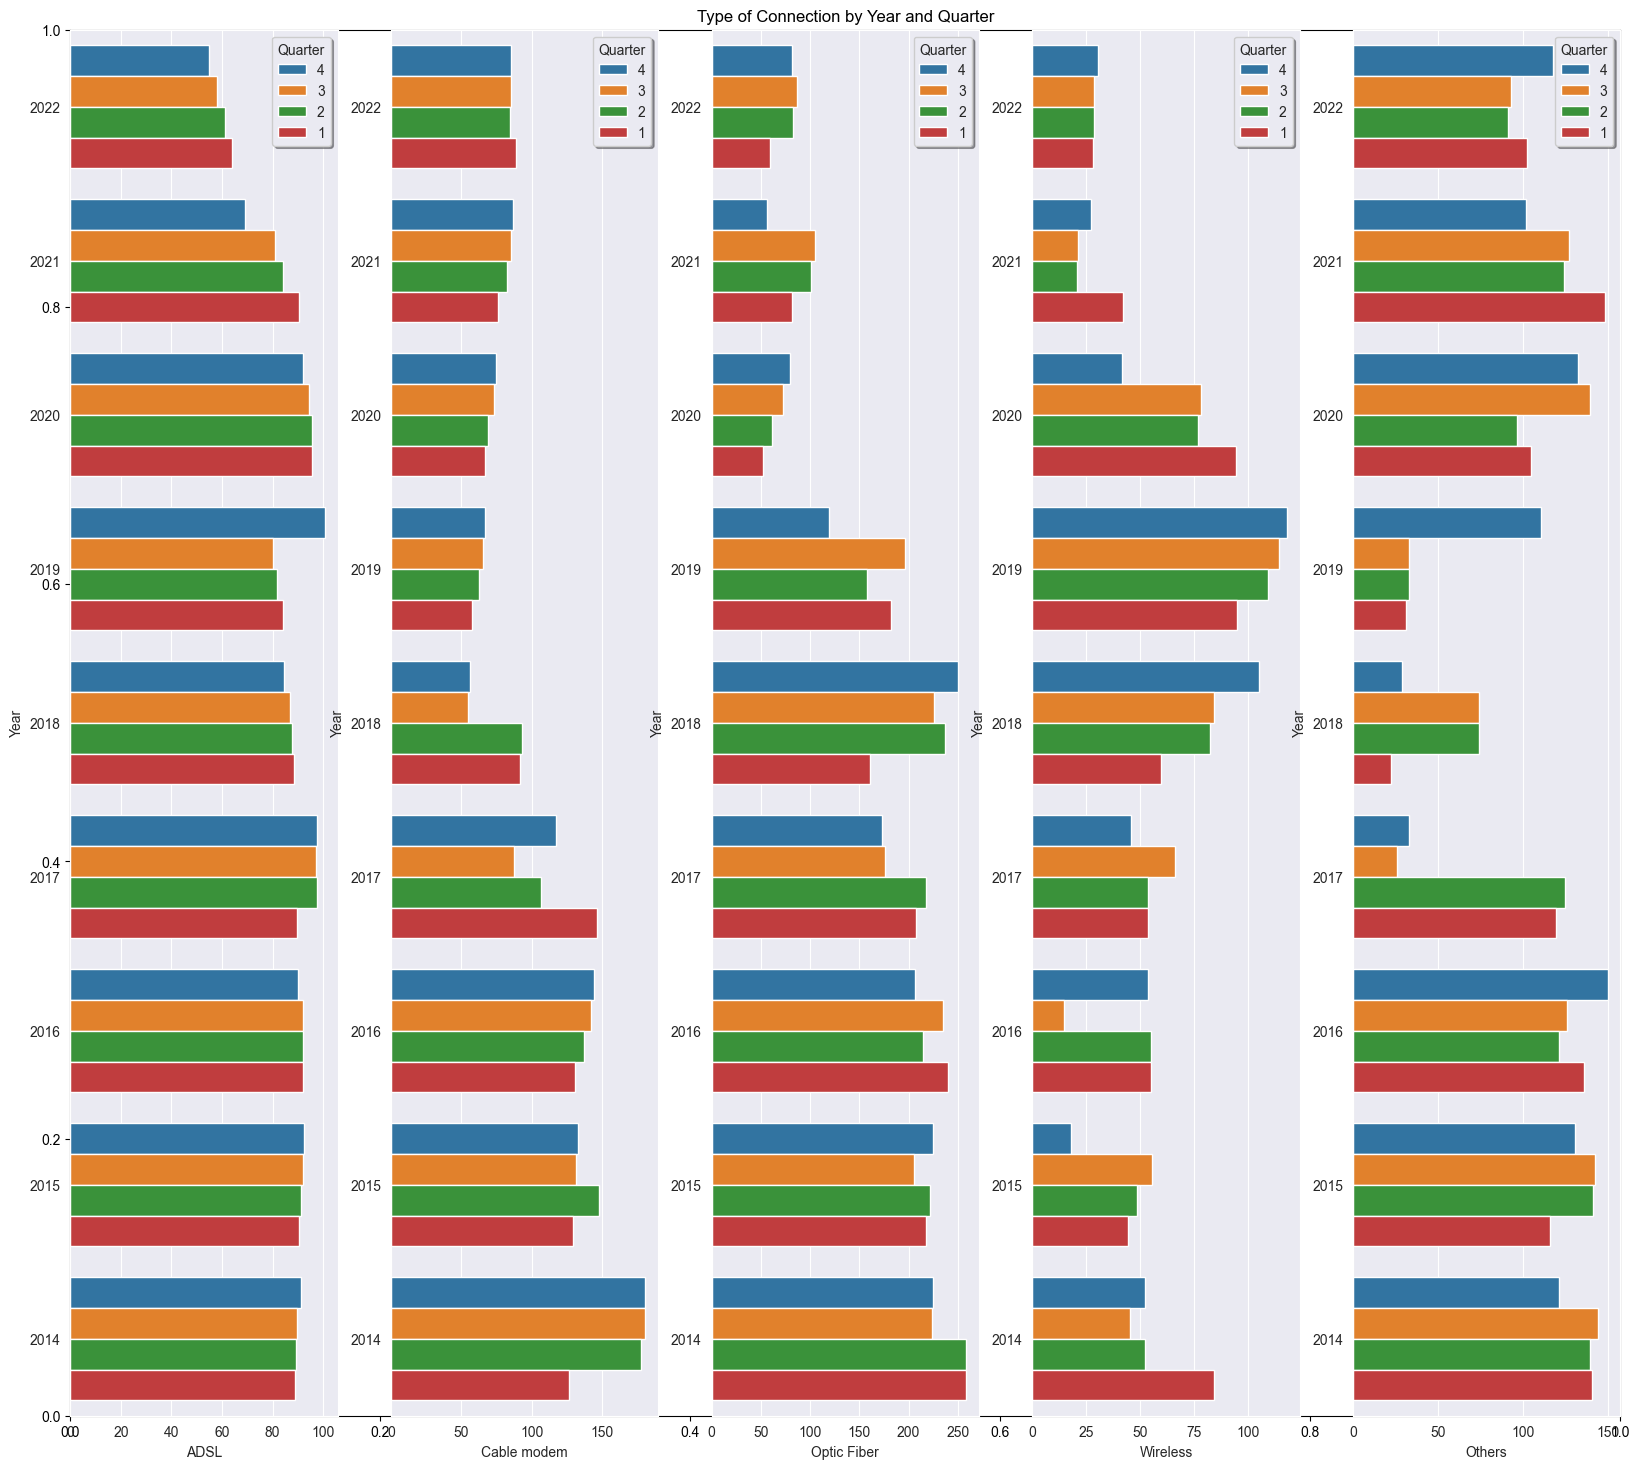

In [22]:
plt.figure(figsize = (20, 18))
plt.title('Type of Connection by Year and Quarter')
sns.set_style('darkgrid')


# ADSL barplot
plt.subplot(1, 5, 1)
sns.barplot(data = df, x = 'ADSL', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Cable modem barplot
plt.subplot(1, 5, 2)
sns.barplot(data = df, x = 'Cable modem', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Optic Fiber barplot
plt.subplot(1, 5, 3)
sns.barplot(data = df, x = 'Optic Fiber', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Wireless barplot
plt.subplot(1, 5, 4)
sns.barplot(data = df, x = 'Wireless', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Others barplot
plt.subplot(1, 5, 5)
sns.barplot(data = df, x = 'Others', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


plt.show()

## Some takeaways

 - Although it saw a slight increase from 2018 to 2020, ``Wireless`` connection is the least popular throughout the years. <br>
 - In the last year, the ``ADSL`` connection was the most popular one. <br>
 - ``Optic fiber`` has dropped significantly in the last two years compared to the previous ones.<br>

## See the number of connections for each province

In [23]:
df['Total Connections'] = df['Wireless'] + df['Optic Fiber'] + df['ADSL'] + df['Cable modem']

In [24]:
dfTotal = df.groupby('Province')['Total Connections'].sum()

In [25]:
dfTotal = dfTotal.sort_values(ascending = False)

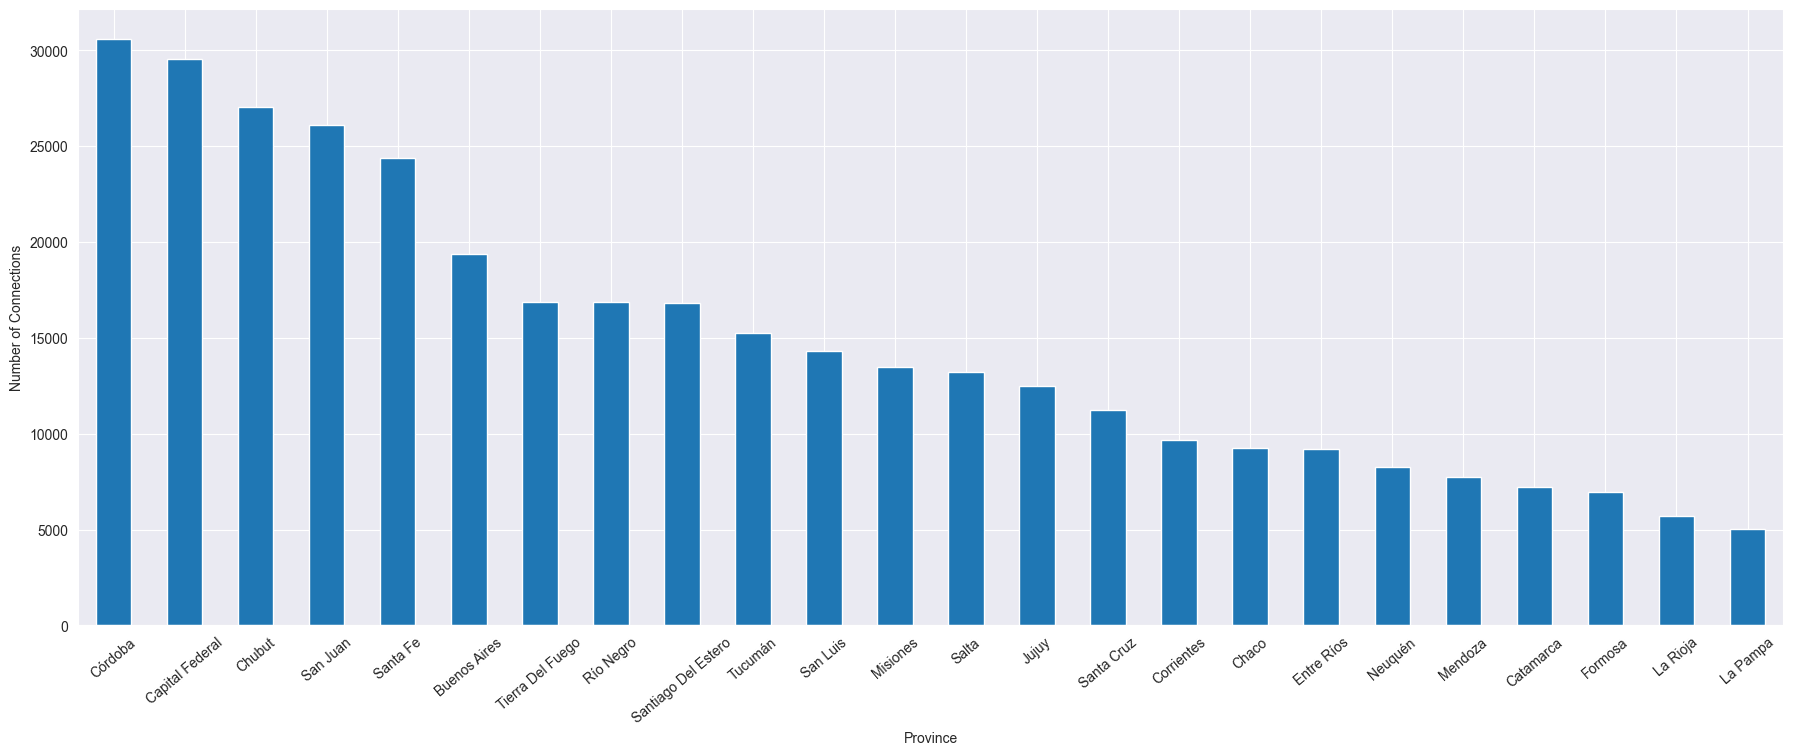

In [26]:
plt.figure(figsize = (22, 8))
dfTotal.plot(kind = 'bar')
plt.xlabel('Province')
plt.ylabel('Number of Connections')
plt.xticks(rotation = 40)
plt.show()

 - As we can see, the province with the most connections is ``Córdoba``, whereas the province with the least amount of connections is `La Pampa`
 - More than half the provinces have 10000 or more connections. We could aim to get the remaining 9 provinces to be up there.
___
___

# Load a second csv file, which shows the download speed by province

In [27]:
df2 = pd.read_csv('../DataSets/Internet_Accesos-por-velocidad_por_pcia.csv', sep = ',')

In [28]:
df2.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


### Rename the columns for an easier read

In [29]:
df2Columns = {'Año': 'Year', 'Trimestre': 'Quarter', 'Provincia': 'Province', 'HASTA 512 kbps': 'Up To 512 kbps', 'OTROS': 'Others',}

In [30]:
df2.rename(columns = df2Columns, inplace = True)

In [31]:
df2.head()

,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 864 non-null    int64  
 1   Quarter              864 non-null    int64  
 2   Province             864 non-null    object 
 3   Up To 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  Others               858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


### Check for null and duplicate values

In [33]:
df2.isna().sum()

Year                   0
Quarter                0
Province               0
Up To 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
Others                 6
Total                  0
dtype: int64

### Drop all the null values

In [34]:
df2.dropna(inplace = True)

In [35]:
df2.isna().sum()

Year                   0
Quarter                0
Province               0
Up To 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
Others                 0
Total                  0
dtype: int64

### See if there is any duplicate value

In [36]:
df2.duplicated().value_counts()

False    858
Name: count, dtype: int64

In [37]:
df2.head(2)

,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926


### We see that there are some irregular values in the '`+ 30 Mbps`' column, we'll check for any outliers value

In [55]:
df2['+ 30 Mbps'] = pd.to_numeric(df2['+ 30 Mbps'], errors = 'coerce')

In [56]:
grouped = (df2.groupby('Province')['+ 30 Mbps'].mean())

In [57]:
grouped

Province
Buenos Aires           136.588227
Capital Federal        212.255500
Catamarca               11.893139
Chaco                   84.618472
Chubut                  89.362583
Corrientes              78.239083
Córdoba                301.485861
Entre Ríos             104.813444
Formosa                 46.141306
Jujuy                   27.486250
La Pampa                87.744972
La Rioja                70.804629
Mendoza                 53.905743
Misiones                54.400750
Neuquén                 79.632722
Río Negro               53.361194
Salta                   58.175694
San Juan                51.767472
San Luis                 6.172972
Santa Cruz             112.323029
Santa Fe               220.907833
Santiago Del Estero     38.059194
Tierra Del Fuego       208.023371
Tucumán                 63.156600
Name: + 30 Mbps, dtype: float64

<Axes: xlabel='+ 30 Mbps', ylabel='Province'>

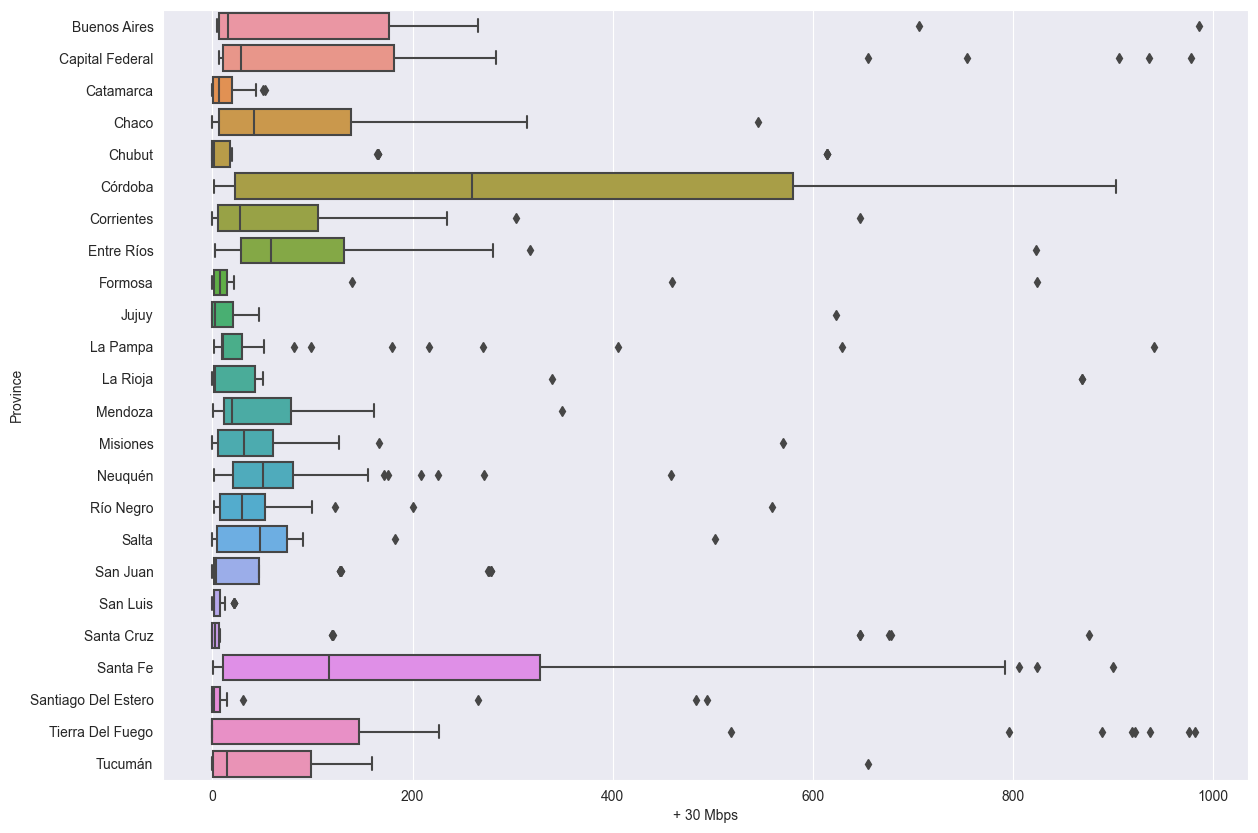

In [64]:
plt.figure(figsize = (14, 10))

sns.boxplot(df2, x = df2['+ 30 Mbps'], y = 'Province')
# plt.xlim(0, 520)